

> # ***Descriptive and Exploratory Data Analysis project on a Spotify dataset from Kaggle.***




<img src="https://drive.google.com/uc?export=view&id=1nb0A--PW_0WplvI1n9Klh7EeBSCUy-ff" width="900" height="600" />



## A special thanks ko Yaman Eren Ay for providing this dataset. 
Here is the link to the original dataset-> https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

# ***Objectives -***

*   Explore the dataset and find out the different correlations between the dataset elements.

*   Check the dataset and clean it if it is needed.
*   Perform Exploratory Data Analysis on the data.


*   Lastly, provide valuable observations from the dataset.



# ***Table of Contents -***



1.   *Introduction*

1.   *Brief explanation of the elements in the dataset*

1.   *Importing dependecies and exploring the data*

1.   *Feature Analysis*

2.   *Key Based Analysis*

2.   *Genre Based Analysis*

2.   *Artist Based Analysis*

1.   *Genre popularity over decades*
2.   *Favourites Analysis* 





# ***1. Introduction***

**Spotify** is a **Swedish** audio streaming and media services provider **founded in 2006** by ***Daniel Ek***. It is one of the world's largest music streaming service providers, with over **356 million** monthly active users, including **158 million** paying subscribers, as of March 2021.

Spotify offers digital copyright restricted recorded music and podcasts, including more than **70 million songs**, from record labels and media companies. As a freemium service, basic features are free with advertisements and limited control, while additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.

Spotify is available in most of **Europe** and the **Americas**, **Oceania** and parts of **Africa (including South Africa and Mauritius)** and **Asia**. By the end of 2021, Spotify is expected to operate in a total of 178 countries. The service is available on most modern devices including Windows, macOS, and Linux computers, iOS and Android smartphones and tablets and AI enabled smart speakers such as Amazon Echo and Google Home.

## ***Structure of the Dataset***



### tracks.csv




Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)



###artists.csv



- id (Id of artist)
- name (Name of artist)
- followers (Total number of followers of artist)
- popularity (Popularity of given artist based on all his/her tracks)
- genres (Genres associated with this artist)

# ***2. Brief Explanation of the dataset elements***

We'll take a look at some of the important features of the database based on which we will be performing further analysis on the dataset. These features will help distinguish between the different quantitative as well as qualitative aspects of each element in the dataset.


**Feature Definitions**
1. ***artists***: The list of artists of the song.

2. ***danceability***: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

3. ***duration_ms***: The duration of the track in milliseconds.

4. ***energy***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
7. ***instrumentalness***: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

8. ***key***: The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

9. ***liveness***: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

10. ***loudness***: The overall loudness of a track in decibels (dB).

11. ***mode***: Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.

12. ***name***: Name of the song.

13. ***popularity***: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. 

14. ***release_date***: The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.

15. ***speechiness***: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

16. ***tempo***: The overall estimated tempo of a track in beats per minute (BPM). 

17. ***valence***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
18. ***year***: Year information extracted from release_date.

19. ***genres***: A list of the genres used to classify the album. For example: “Prog Rock” , “Post-Grunge”. (If not yet classified, the array is empty.)

# ***3. Importing dependencies and exploring the data***

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 3.4MB/s 


In [2]:
pip install opendatasets --upgrade --quiet


In [3]:
import opendatasets as od
download_url="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: parasbisht126
Your Kaggle Key: ··········


  3%|▎         | 5.00M/195M [00:00<00:05, 36.7MB/s]

100%|██████████| 195M/195M [00:03<00:00, 66.5MB/s]


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("./spotify-dataset-19212020-160k-tracks/data_o.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [7]:
df.describe().transpose()

count           mean  ...          75%          max
valence           170653.0       0.528587  ...       0.7470        1.000
year              170653.0    1976.787241  ...    1999.0000     2020.000
acousticness      170653.0       0.502115  ...       0.8930        0.996
danceability      170653.0       0.537396  ...       0.6680        0.988
duration_ms       170653.0  230948.310666  ...  262400.0000  5403500.000
energy            170653.0       0.482389  ...       0.7030        1.000
explicit          170653.0       0.084575  ...       0.0000        1.000
instrumentalness  170653.0       0.167010  ...       0.1020        1.000
key               170653.0       5.199844  ...       8.0000       11.000
liveness          170653.0       0.205839  ...       0.2610        1.000
loudness          170653.0     -11.467990  ...      -7.1830        3.855
mode              170653.0       0.706902  ...       1.0000        1.000
popularity        170653.0      31.431794  ...      48.0000      100.000
speechiness       170653.0       0.098393  ...       0.0756        0.970
tempo             170653.0     116.861590  ...     135.5370      243.507

[15 rows x 8 columns]

*Setting the index to be the release date in the main dataframe ->*

In [8]:
df.set_index("release_date", inplace=True)

In [9]:
df.index=pd.to_datetime(df.index)

In [10]:
df.head()

valence  year  acousticness  ... popularity  speechiness    tempo
release_date                               ...                                 
1921-01-01     0.0594  1921         0.982  ...          4       0.0366   80.954
1921-01-01     0.9630  1921         0.732  ...          5       0.4150   60.936
1921-01-01     0.0394  1921         0.961  ...          5       0.0339  110.339
1921-01-01     0.1650  1921         0.967  ...          3       0.0354  100.109
1921-01-01     0.2530  1921         0.957  ...          2       0.0380  101.665

[5 rows x 18 columns]

In [11]:
df[["artists"]].iloc[-1]

artists    ['KEVVO', 'J Balvin']
Name: 2020-10-16 00:00:00, dtype: object

In [12]:
df[["artists"]].iloc[0]

artists    ['Sergei Rachmaninoff', 'James Levine', 'Berli...
Name: 1921-01-01 00:00:00, dtype: object

*Adding a duration column in seconds rather than minutes as was in the original dataset ->*

In [13]:
df["duration"]= df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)

In [14]:
df.duration.head()

release_date
1921-01-01    832
1921-01-01    181
1921-01-01    500
1921-01-01    210
1921-01-01    167
Name: duration, dtype: int64

# ***4. Feature Analysis***

## Finding the correlation 

[Text(0.5, 0, 'valence'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'popularity'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'duration')]

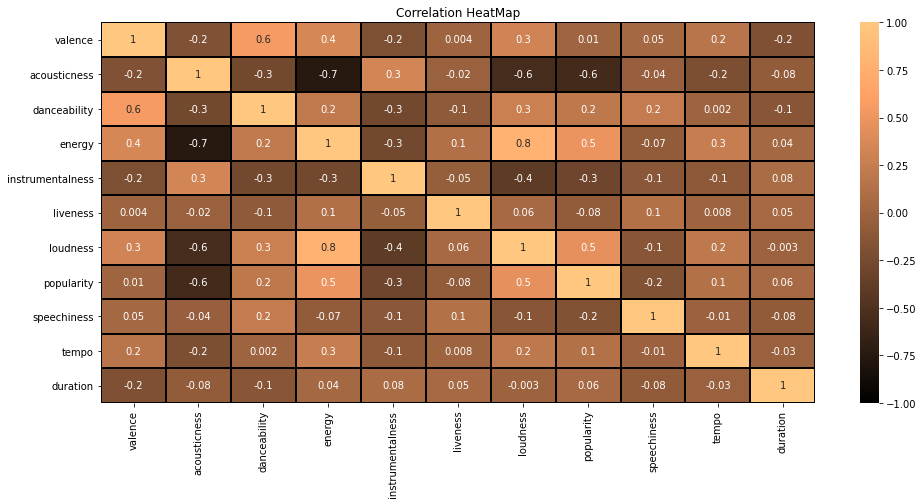

In [15]:
corr_df=df.drop(["key","mode","year","explicit"],axis=1).corr(method="pearson")
plt.figure(figsize=(16,7))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g", vmin=-1, vmax=1, center=0, cmap="copper", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation HeatMap")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

From this Correlation Heatmap, we can observe that **acousticness** seems to have a strong **negative** correlance with **energy** and somewhat strong **negative** correlances with **loudness** and **popularity**.

**Energy** and **loudness** seem to have a strong **positive** correlance, while somewhat strong **positive** correlances are present between **loudness** and **popularity** and **danceability** and **valence**.

In [16]:
sample_df=df.sample(int(0.01*len(df)))

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

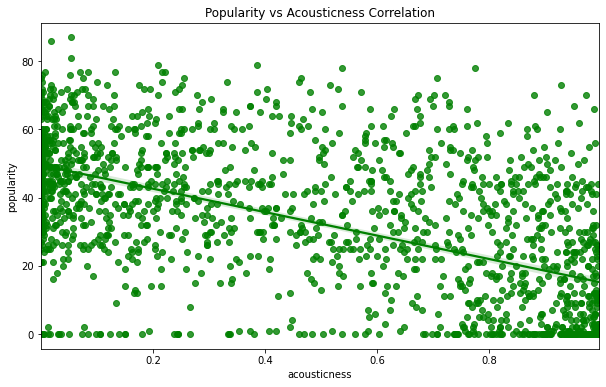

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="popularity", x="acousticness",color="g").set(title="Popularity vs Acousticness Correlation")


As we saw from the heatmap above, popularity and acousticness have a negative correlance. As the acousticness increases, we can see that the popularity decreases and vice versa.

[Text(0.5, 1.0, 'Popularity vs Energy Correlation')]

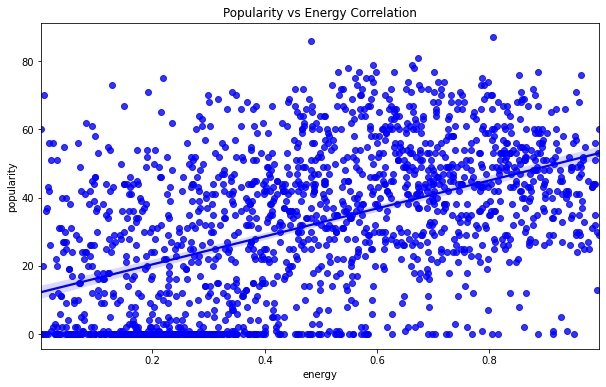

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="popularity", x="energy", color="b").set(title="Popularity vs Energy Correlation")

Similary, popularity and energy follow a positive correlance. As the energy increases, so does the popularity and vice versa.

In [19]:
df['dates']=df.index.get_level_values('release_date')
df.dates=pd.to_datetime(df.dates)
years=df.dates.dt.year

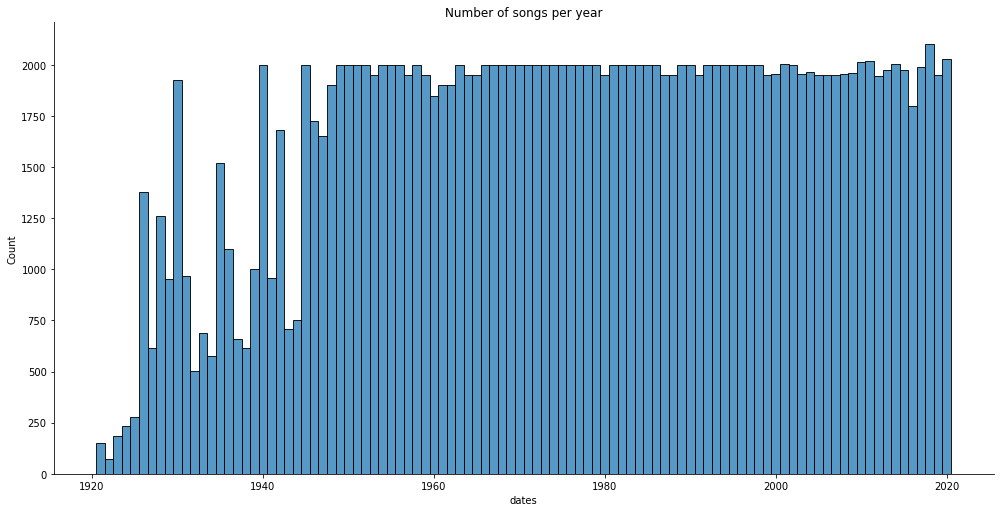

In [20]:

sns.displot(years,discrete=True,aspect=2,height=7 ,kind="hist").set(title="Number of songs per year")

The above displot shows the numbers of songs present for each year in the dataset according to their release date. It is no surprise that the number of songs have increased for the recent years since music became much accesible to record and listen to as technology progressed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

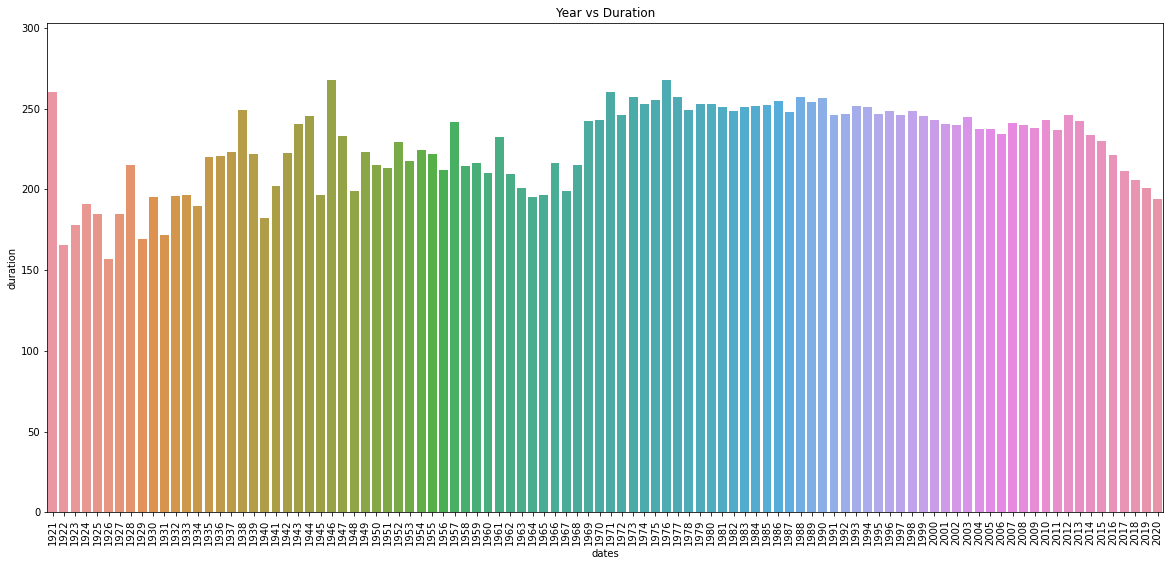

In [21]:
dr=df.duration
fig_dims = (20, 9)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years, y=dr,ax=ax,errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

Shown above is a bar plot for the average duration of songs for each year from 1921-2020. 

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 8 Text major ticklabel objects>)

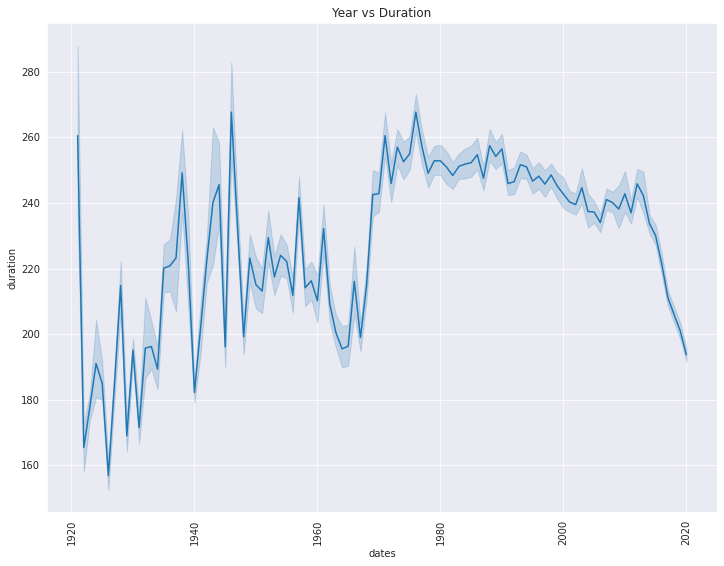

In [22]:
dr=df.duration
sns.set_style(style="darkgrid")
fig_dims = (12, 9)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years, y=dr,ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=90)

Given above is the line plot for the average duration of songs over the years. As we can see, the songs from 1920s to 1960s have comparatively shorter durations since most of the songs tended to be more singing based rather than instrument based. However, the trend changed in the 60s and 70s when new genres such as Hard Rock and Metal popped up with amazing instrumental parts which resulted in increasing the duration of the songs. This trend continued up until the 2010s. In the present day,  the duration of songs is declining again since the attention span of the average listener is also declining. This can be attributed to the vast plethora of resources and music available on the internet. So the artists of today has a very small apan to leave an impact on the listener and thus has to shorten his song duration.

In [23]:
df[df["duration"]==df["duration"].min()].iloc[0]

valence                                  0
year                                  1949
acousticness                             0
artists                  ['Sarah Vaughan']
danceability                             0
energy                                   0
explicit                                 0
id                  0hr9kRUi2X4MXc72A4VxG4
instrumentalness                         0
key                                      0
liveness                                 0
loudness                               -60
mode                                     0
name                           Pause Track
popularity                               0
speechiness                              0
tempo                                    0
duration                                 5
dates                  1949-01-01 00:00:00
Name: 1949-01-01 00:00:00, dtype: object

The track named as **Pause Track** has a duration of 5 seconds and is the shortest track in the database. Pause tracks were used in the older days to provide a brief silent transition between two songs in an album.

In [24]:
df[df["duration"]==df["duration"].max()].iloc[0]

valence                                    0
year                                    2013
acousticness                           0.111
artists                    ['Sound Dreamer']
danceability                               0
energy                               9.9e-05
explicit                                   0
id                    7foc25ig7dibxvULPU2kBG
instrumentalness                       0.392
key                                        2
liveness                               0.137
loudness                             -21.669
mode                                       1
name                Brown Noise - 90 Minutes
popularity                                50
speechiness                                0
tempo                                      0
duration                                5404
dates                    2013-06-05 00:00:00
Name: 2013-06-05 00:00:00, dtype: object

The track called **Brown noise - 90 minutes** is the track with the longest duration in the database. In science, Brownian noise, also known as Brown noise or red noise, is the kind of signal noise produced by Brownian motion, hence its alternative name of random walk noise.

Most people listen to thos noise on loop for relaxation purposes, to fall asleep or meditation. Thus it is no surprise that brown noise is the longest track on this dataset.

## Analysis over decades


In [25]:
decades_df=df.resample("10A").mean()
decades_df.index=[f"{date_index-1}'s " for date_index in decades_df.index.year]
decades_df

valence         year  ...       tempo    duration
1920's   0.379327  1921.000000  ...  101.531493  260.540000
1930's   0.559806  1928.152301  ...  110.291314  183.592550
1940's   0.565050  1937.136085  ...  111.127600  207.879197
1950's   0.474732  1947.040809  ...  108.024004  222.250152
1960's   0.482543  1956.451531  ...  111.261230  221.946429
1970's   0.562662  1966.532805  ...  116.242279  217.915804
1980's   0.588476  1976.491228  ...  120.930492  254.092130
1990's   0.553882  1986.483627  ...  120.676386  251.997431
2000's   0.547562  1996.487244  ...  119.137379  246.655133
2010's   0.519385  2006.514505  ...  122.093428  239.195354
2020's   0.452329  2016.026616  ...  120.850426  220.372517

[11 rows x 15 columns]

In [26]:
trend_df=decades_df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence","duration"]]
trend_df

acousticness  danceability  ...   valence    duration
1920's       0.886896      0.418597  ...  0.379327  260.540000
1930's       0.836853      0.574362  ...  0.559806  183.592550
1940's       0.855998      0.530767  ...  0.565050  207.879197
1950's       0.874109      0.469578  ...  0.474732  222.250152
1960's       0.817146      0.477589  ...  0.482543  221.946429
1970's       0.565065      0.498178  ...  0.562662  217.915804
1980's       0.367144      0.533647  ...  0.588476  254.092130
1990's       0.306521      0.545659  ...  0.553882  251.997431
2000's       0.298645      0.574354  ...  0.547562  246.655133
2010's       0.263666      0.569200  ...  0.519385  239.195354
2020's       0.260446      0.616211  ...  0.452329  220.372517

[11 rows x 8 columns]

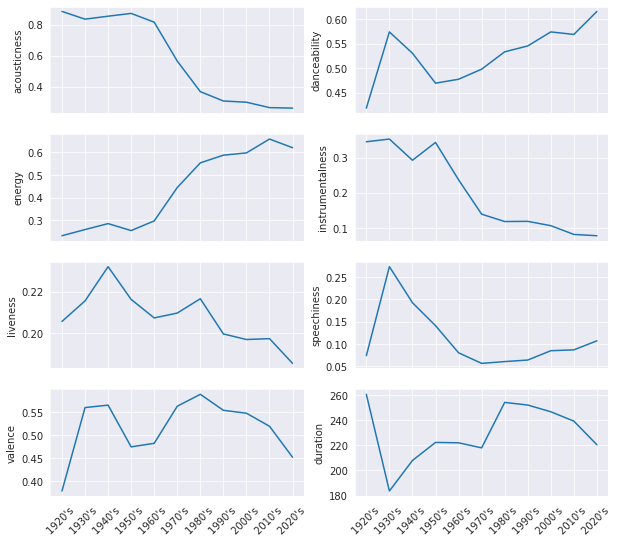

In [27]:
i=0
f, axes = plt.subplots(4, 2, figsize=(10, 9), sharex=True)
for ax in f.axes:
    sns.lineplot(x=trend_df.index, y=trend_df.iloc[:,i], data=trend_df, ax=ax)
    plt.sca(ax)
    plt.xticks(rotation=45)
    i=i+1

The plots displayed above show the trend of the various features over the years from 1920s-2020s. 

**Acousticness** - Acousticness has seen a rapid decline since the 1960's and 70s. This can be attributed to the emergence of Metal and rock music which focused a lot on the musical aspects of the song as well, i.e the instruments. This trend continued up until as recently as the late 2010s when the spectrum of music is changing again to be more vocal based rather than instrument based. Hence we see the curve flattening.


**Danceability** - Danceability seemed to have a sharp rise in the 1920s but then declined until the 1950s. After the 1950s, danceabilty has been on the upward trend. With the direction that music seems to be currently heading in, there seems to be no sign of it declining again in the near future.


**Energy** - Energy seems to be on a constant rise since the 1960s. The 1960s and 70s were a very exciting time for music. Up until then, music was generally perceived to be a soft affair that soothes the listener. However since the 1960s, new artists began to pop up with energentic songs such as Helter Skelter by The Beatles, Whole Lotta Love by Led Zeppelin, Bohemian Rhaspody by Queen etc. Thus people began to perceive music as a way of expressionj more during this period. Hence, those energy elements have become an important part of making music now and this trend won't likely be going down in the near future.


**Instrumentalness** - Instrumental music has seen a rapid decline since the early 1900s. This can be attributed to the fact that Classical Music isn't as popular now like it was in those early days. Nowdays, music has gotten a lot more inclusive of all the genres and hence we see a rapid decline in instrumentalness.


**Liveness** - Liveness has seen a gradual but steady decline snce the ealy 1900s with a few exceptions being 1930s and 1970s. Since music is such a technical affair as well, the prodcution of music needs to evolve with the advent of new technology. Thus the liveness of music has seen a decline since live music is a complicated affair to record and it can be having flaws which might be perceived as distracting by the listener.


**Speechiness** - Speechiness had been on the decline but with the new found popularity of podcasts in the recent years, it is slowly beginning to rise again.


**Valence** -  Although Valence has seen a few fluctuations over the decades, it has more or less stayed the same.


**Duration** - The duration of songs was a large during the Classical music era but began to decline in the 1930s. It then went up in the 1960s which can be attributed to the emregence of new genres such as Metal, Rock etc. It has been on a steady decline ever since.

# ***5. Key based analysis***

There are **12 keys** in Western Music and **7 Musical letters**. They are C, D, E, F, G, A, B and back to C. All letters except **B** and **E** have sharps, thus the 12 keys are formed. 

In [28]:
key={0:"C",1:"C♯",2:"D",3:"D♯",4:"E",5:"F",6:"F♯",7:"G",8:"G♯",9:"A",10:"A♯",11:"B"}
key_df=pd.DataFrame(df["key"].value_counts())

A dictionary with the name key is created that contains each key with it's numerical equivalent in the database.

In [29]:
key_df.head()

key
0  21600
7  20803
2  18823
9  17571
5  16430

In [30]:
key_df["key names"]= key_df.index.to_series().map(key)
key_df

key key names
0   21600         C
7   20803         G
2   18823         D
9   17571         A
5   16430         F
4   12933         E
1   12886        C♯
10  12148        A♯
8   10751        G♯
11  10670         B
6    8741        F♯
3    7297        D♯

The key names have been mapped with their equivalent numerical values.

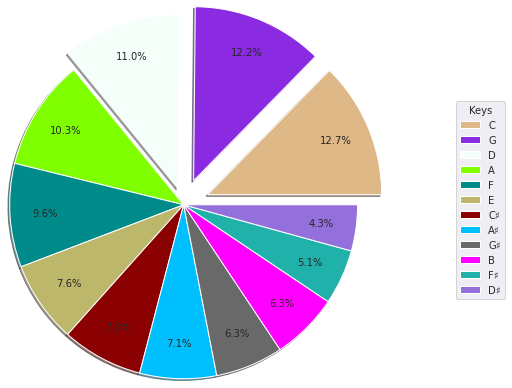

In [31]:
colors=["#DEB887","#8A2BE2", "#F5FFFA", "#7FFF00", "#008B8B", "#BDB76B", "#8B0000", "#00BFFF","#696969","#FF00FF","#20B2AA","#9370DB"]
plt.figure(figsize=(12,4))
key_labels=key_df["key names"].values
key_values=key_df["key"].values
plt.pie(key_values,shadow=True,pctdistance=0.8, autopct="%.1f%%",radius=2,explode=(0.3,0.3,0.2,0,0,0,0,0,0,0,0,0),center=(2,3),colors=colors)
plt.legend(labels=key_labels, bbox_to_anchor=(2,1),title="Keys")


The pie graph above shows the distribution of keys in the dataset. As can be observed, the most used keys are C, G and D. If we delve a little into the basics of music theory, we see that that the key of C has no sharps.

**Scale of C** -> *C - D - E - F - G - A - B - C* 

Since this key has no sharps, it is easiest scale to play on an instrument. Hence, it is the most used key in music.

The same can be said about the key of G. The key of G has only one sharp.

**Scale of G** -> *G - A - B - C - D - E - F# - G*

The next 2 most used keys are D and A, and they have 2 and 3 sharps respectively. Hence we see that the usage of the different keys has a dependance on the ease of the key.







---



---



The modes can be divided into two categories, **Major** and **Minor**.

The sound of Major is usually associated with happiness and blissfulness, while the sound of minor is usually associated with sadness or gloominess.

In [32]:
mode={0:"Minor", 1:"Major"}
mode_df=pd.DataFrame(df["mode"].value_counts())
mode_df["Mode names"]=mode_df.index.to_series().map(mode)
mode_df

mode Mode names
1  120635      Major
0   50018      Minor

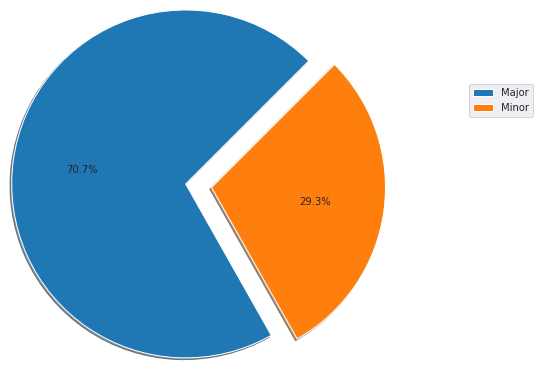

In [33]:
plt.figure(figsize=(10,4))
mode_labels=mode_df["Mode names"].values
mode_values=mode_df["mode"].values
plt.pie(mode_values,shadow=True,autopct="%.1f%%",radius=2,explode=(0.3,0),center=(2,1), startangle=45)
plt.legend(labels=mode_labels, bbox_to_anchor=(2,1))

From the pie chart above, it can be observed that most of the songs tend to be in the Major Scale. This can be attributed to the happy characteristic sound of the Major key.

# ***6. Genre Based Analysis***

In [34]:
genre_df=pd.read_csv("./spotify-dataset-19212020-160k-tracks/data_by_genres_o.csv")

Accessing the data_by_genres_o.csv dataset 

In [35]:
genre_df.isna().any()

mode                False
genres              False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
valence             False
popularity          False
key                 False
dtype: bool

In [36]:
genre_df['duration'] = genre_df['duration_ms'].apply(lambda x:round(x/1000))
genre_df.drop('duration_ms',axis=1,inplace=True)
genre_df.drop(['genres','key','mode'],axis=1).describe().transpose().sort_index()

count        mean  ...         75%          max
acousticness      2973.0    0.401241  ...    0.673991     0.996000
danceability      2973.0    0.537187  ...    0.647500     0.929000
duration          2973.0  251.715439  ...  277.000000  2383.000000
energy            2973.0    0.561143  ...    0.730127     0.994667
instrumentalness  2973.0    0.211366  ...    0.343333     0.992000
liveness          2973.0    0.192800  ...    0.220856     0.960000
loudness          2973.0  -10.509848  ...   -6.920125     0.060000
popularity        2973.0   39.919185  ...   51.138889    80.666667
speechiness       2973.0    0.083588  ...    0.091000     0.946219
tempo             2973.0  119.018723  ...  127.508750   204.212000
valence           2973.0    0.492748  ...    0.640257     0.980000

[11 rows x 8 columns]

In [37]:
genre_df.head()

mode                  genres  acousticness  ...  popularity  key  duration
0     1  21st century classical      0.979333  ...   27.833333    6       160
1     1                   432hz      0.494780  ...   52.500000    5      1049
2     1                   8-bit      0.762000  ...   48.000000    7       115
3     1                      []      0.651417  ...   20.859882    7       233
4     1              a cappella      0.676557  ...   45.820071    7       191

[5 rows x 14 columns]

*Removing the rows where the genre is not a proper name.*

In [38]:
genre_df[genre_df['genres']=="[]"]

mode genres  acousticness  danceability  ...   valence  popularity  key  duration
3     1     []      0.651417      0.529093  ...  0.513604   20.859882    7       233

[1 rows x 14 columns]

In [39]:
genre_df=genre_df[genre_df['genres']!="[]"]

In [40]:
genre_df.head()

mode                  genres  acousticness  ...  popularity  key  duration
0     1  21st century classical      0.979333  ...   27.833333    6       160
1     1                   432hz      0.494780  ...   52.500000    5      1049
2     1                   8-bit      0.762000  ...   48.000000    7       115
4     1              a cappella      0.676557  ...   45.820071    7       191
5     1                abstract      0.459210  ...   43.500000    1       343

[5 rows x 14 columns]

In [41]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2972 non-null   int64  
 1   genres            2972 non-null   object 
 2   acousticness      2972 non-null   float64
 3   danceability      2972 non-null   float64
 4   energy            2972 non-null   float64
 5   instrumentalness  2972 non-null   float64
 6   liveness          2972 non-null   float64
 7   loudness          2972 non-null   float64
 8   speechiness       2972 non-null   float64
 9   tempo             2972 non-null   float64
 10  valence           2972 non-null   float64
 11  popularity        2972 non-null   float64
 12  key               2972 non-null   int64  
 13  duration          2972 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 348.3+ KB


In [42]:
genre_df.nunique()

mode                   2
genres              2972
acousticness        2801
danceability        2724
energy              2780
instrumentalness    2732
liveness            2714
loudness            2871
speechiness         2719
tempo               2871
valence             2745
popularity          2185
key                   12
duration             373
dtype: int64

[Text(0.5, 1.0, 'Top 10 genres by popularity')]

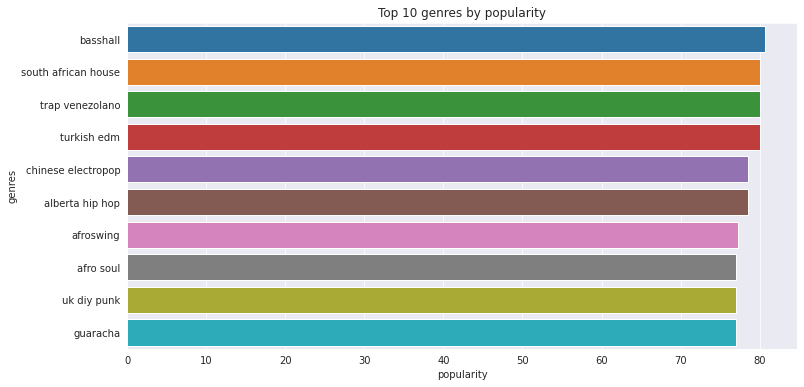

In [43]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(12,6))
popu=genre_df.sort_values("popularity", ascending=False).head(10)
sns.barplot(y="genres", x="popularity", data=popu, ).set(title="Top 10 genres by popularity")


Displayed in the barplot above are the genres which have the highest popularity according to the dataset.

In [44]:
genre_df.sort_values("popularity", ascending=True).head(10)[["popularity", "genres"]]

popularity                 genres
590          0.0     classic eurovision
1109         0.0                full on
2637         0.0  swedish jazz orkester
1113         0.0           funk 150 bpm
1965         0.0              nisiotika
987          0.0              esperanto
1921         0.0             nepali pop
1920         0.0           nepali indie
262          0.0       belgian hardcore
1905         0.0              neo-kraut

These 10 genres appear to have a popularity of 0.0, which either might need some rechecking or may be some of the worst known genres of the dataset. OOPS!

## Duration of Genres

In [45]:
genre_df.sort_values("duration", ascending=False).head(5)

mode                  genres  acousticness  ...  popularity  key  duration
401      0  bulgarian experimental         0.681  ...   20.666667    4      2383
1879     1    musique pour enfants         0.913  ...   27.000000    0      1622
1297     1   histoire pour enfants         0.913  ...   27.000000    0      1622
2074     0                 oratory         0.988  ...    9.000000   10      1469
1775     1              microtonal         0.773  ...   29.500000    7      1209

[5 rows x 14 columns]

[Text(0.5, 1.0, 'Top 10 genres with the longest average duration')]

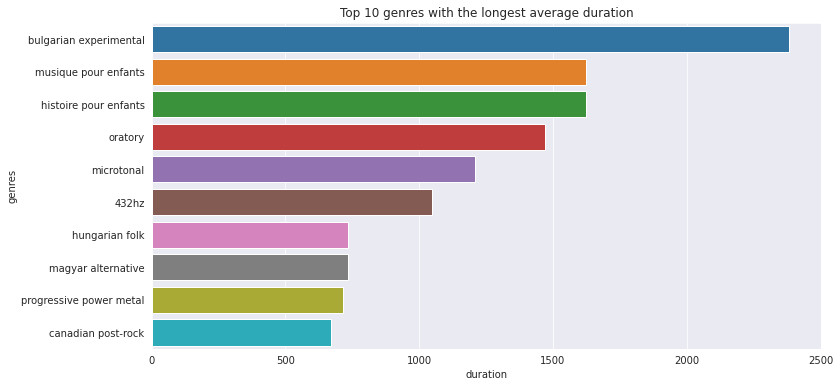

In [46]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(12,6))
dur=genre_df.sort_values("duration", ascending=False).head(10)
sns.barplot(y="genres", x="duration", data=dur ).set(title="Top 10 genres with the longest average duration")


Displayed above are the top ten genres with the longest average duration of songs in seconds. 

It's no surprise that most of the genres seem to be emphasising more on the instruments than the vocals because it would be very hard for a vocalist to sing for the whole of a 1000 seconds(or more?)!

In [47]:
genre_df.sort_values("duration").head(10)

mode                         genres  ...  key  duration
364      1       british children's music  ...    8        31
2964     0                    zambian pop  ...    1        43
1878     1  musique pour enfant quebecois  ...    3        45
1358     0               indie deutschrap  ...    5        56
1201     0                gospel italiano  ...    8        70
862      1                detske pisnicky  ...    3        71
2862     0               vgm instrumental  ...    0        72
2313     1                       recorder  ...    2        88
2958     1                           yoga  ...    2        89
880      1                        dong-yo  ...    2        89

[10 rows x 14 columns]

[Text(0.5, 1.0, 'Top 10 genres with the shortest average duration')]

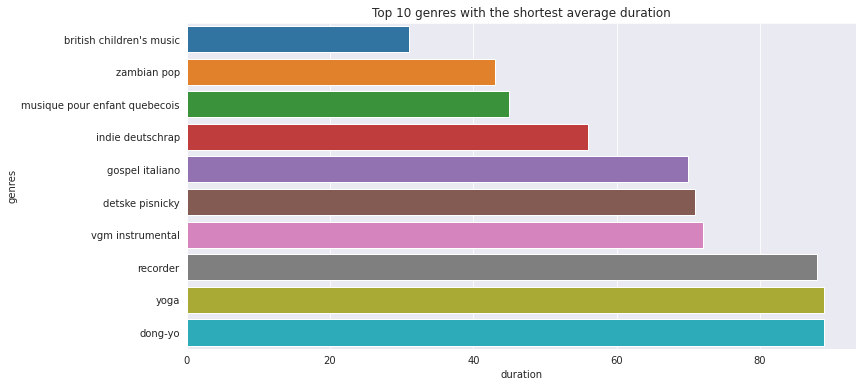

In [48]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(12,6))
dur_min=genre_df.sort_values("duration", ascending=True).head(10)
sns.barplot(y="genres", x="duration", data=dur_min ).set(title="Top 10 genres with the shortest average duration")


Displayed above are the top ten genres according to the shortest duration of their average song time. 

None of these appear to be in the mainstream. Even though the attention span of the average music listener is decreasing, it would be surprising if the attention span drops to just 40 seconds! 

So I doubt any of these genres would ever make an entry in mainstream music.

In [49]:
from collections import Counter
genre_names = " ".join(genre_df['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names).most_common(30)])

These are some of the most common occurences of a word in the dataset.

For ex. Metal can be Heavy Metal, Glam metal, Thrash metal etc. 

In [50]:
most_common_words_in_genres_df

word  count
0            pop    240
1          indie    237
2           rock    183
3          metal    132
4      classical    106
5            hop    103
6            hip    102
7           jazz     96
8           folk     80
9           punk     66
10           rap     64
11          deep     56
12       classic     54
13         house     53
14         piano     43
15      japanese     40
16       swedish     40
17      canadian     38
18         blues     37
19           new     37
20        modern     36
21       italian     36
22   alternative     34
23       country     33
24    australian     33
25          soul     32
26        musica     32
27        german     30
28  contemporary     29
29            uk     28

In [51]:
pip install wordcloud --upgrade --quiet

     |████████████████████████████████| 368kB 7.6MB/s 


In [52]:
" ".join(most_common_words_in_genres_df["word"].tolist())

'pop indie rock metal classical hop hip jazz folk punk rap deep classic house piano japanese swedish canadian blues new modern italian alternative country australian soul musica german contemporary uk'

(-0.5, 2799.5, 1023.5, -0.5)

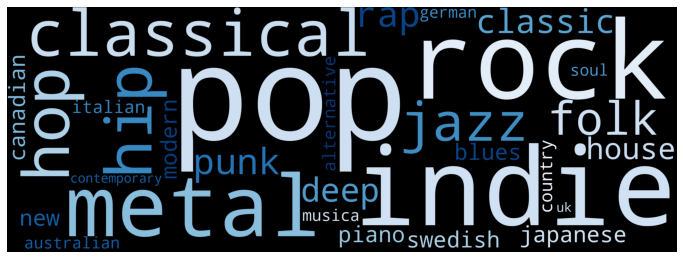

In [53]:
from wordcloud import WordCloud
plt.figure(figsize=(12,8))
wrdcloud=WordCloud(relative_scaling=1, colormap="Blues", width=2800, height=1024).generate(" ".join(most_common_words_in_genres_df["word"].tolist()))
plt.imshow(wrdcloud)
plt.axis("off")

The WordCloud shown above is of the maximum occurences of a given genre name in the datset. Pop, rock and Indie appear to be the most commonly appearing words with Metal being a close 4th.

In [54]:
pop_df=genre_df[genre_df["genres"].str.contains("pop")].sort_values("popularity", ascending=False).head(10)
metal_df=genre_df[genre_df["genres"].str.contains("metal")].sort_values("popularity", ascending=False).head(10)
indie_df=genre_df[genre_df["genres"].str.contains("indie")].sort_values("popularity", ascending=False).head(10)
rock_df=genre_df[genre_df["genres"].str.contains("rock")].sort_values("popularity", ascending=False).head(10)

[Text(0.5, 1.0, 'Top 10 Pop sub genres by popularity')]

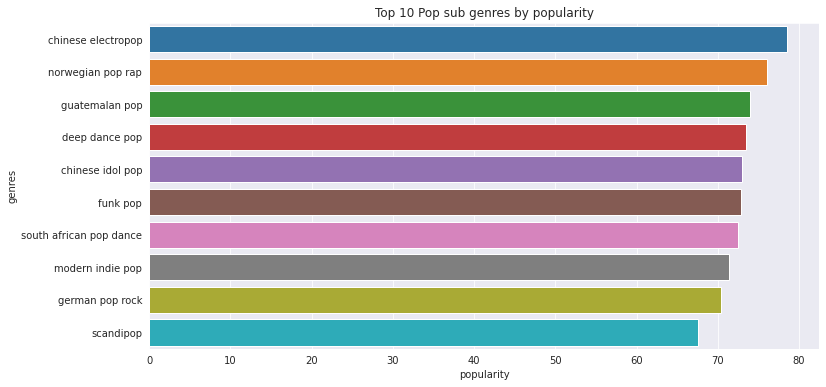

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(y="genres", x="popularity", data=pop_df).set(title="Top 10 Pop sub genres by popularity")

These are the most popular sub_genres in pop music.

[Text(0.5, 1.0, 'Top 10 Metal sub genres by popularity')]

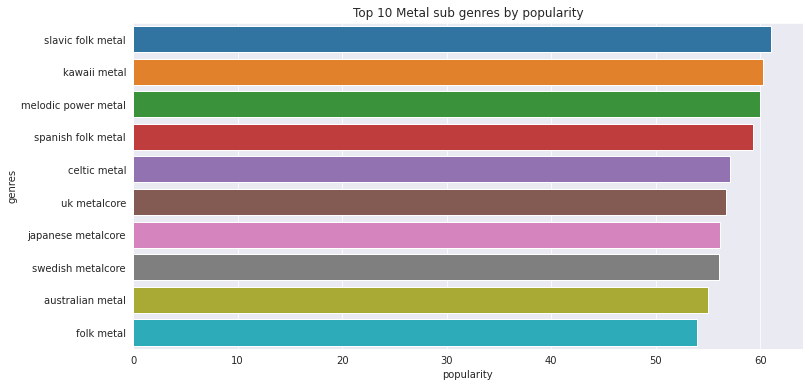

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(y="genres", x="popularity", data=metal_df).set(title="Top 10 Metal sub genres by popularity")

These are the most popular sub-genres in Metal Music.

[Text(0.5, 1.0, 'Top 10 Indie sub genres by popularity')]

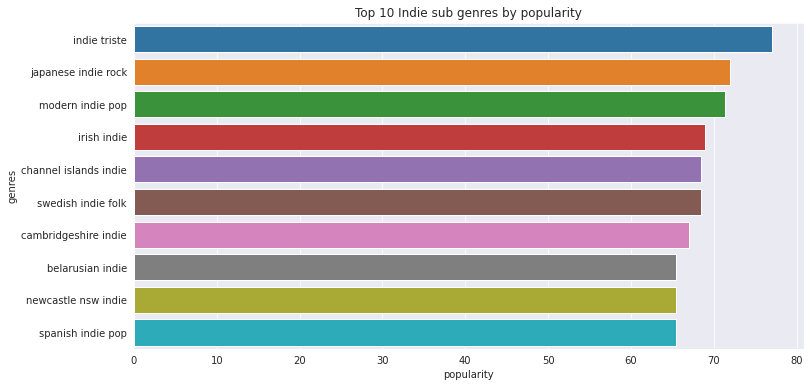

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(y="genres", x="popularity", data=indie_df).set(title="Top 10 Indie sub genres by popularity")

These are the most popular sub-genres in Indie-music.

[Text(0.5, 1.0, 'Top 10 Rock sub genres by popularity')]

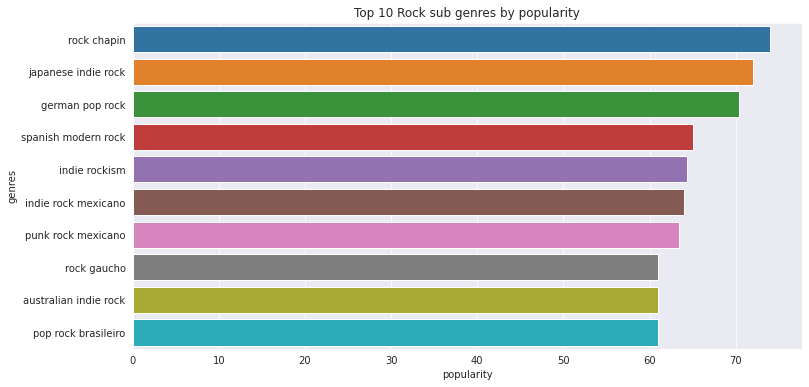

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(y="genres", x="popularity", data=rock_df).set(title="Top 10 Rock sub genres by popularity")

These are the most popular sub-genres in Rock Music.

# ***7. Artist based Analysis***

In [59]:
artists_df=pd.read_csv("./spotify-dataset-19212020-160k-tracks/data_by_artist_o.csv")

In [60]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [61]:
artists_df["artists"].value_counts()

Gyptian                       1
Fess Parker                   1
LSD and the Search for God    1
halberd                       1
Dave Van Kriedt               1
                             ..
PXNDX                         1
Kevon Edmonds                 1
Fink                          1
Amy Liz                       1
Funky                         1
Name: artists, Length: 28680, dtype: int64

In [62]:
years=df.year.unique()
years

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [63]:
top_artists_each_year = [df.query('year==@year').sort_values("popularity",ascending=False).iloc[0] for year in years]
top_artists_each_year_df=pd.DataFrame(top_artists_each_year)
top_artists_each_year_df.head()

valence  year  acousticness  ...    tempo  duration      dates
1921-01-01    0.196  1921         0.579  ...  119.824       395 1921-01-01
1922-02-22    0.127  1922         0.674  ...  104.851       127 1922-02-22
1923-01-01    0.901  1923         0.984  ...  104.606       162 1923-01-01
1924-01-01    0.832  1924         0.816  ...  184.446       206 1924-01-01
1925-01-01    0.580  1925         0.969  ...  112.941       194 1925-01-01

[5 rows x 19 columns]

In [64]:
top_artists_each_year_df["artists"]=top_artists_each_year_df["artists"].apply(lambda x: x.replace("[", "").replace("]","").replace("'",""))
top_artists_each_year_df['genres'] = [artists_df[artists_df.artists.str.contains(artists.split(",")[0])]["genres"].iloc[0].replace("[","").replace("]","") for artists in top_artists_each_year_df["artists"].values]

In [65]:
top_artists_each_year_df.head()

valence  ...                                             genres
1921-01-01    0.196  ...                                                   
1922-02-22    0.127  ...  'corrido', 'nuevo regional mexicano', 'regiona...
1923-01-01    0.901  ...  'adult standards', 'dixieland', 'harlem renais...
1924-01-01    0.832  ...                         'big band', 'vintage jazz'
1925-01-01    0.580  ...  'adult standards', 'big band', 'easy listening...

[5 rows x 20 columns]

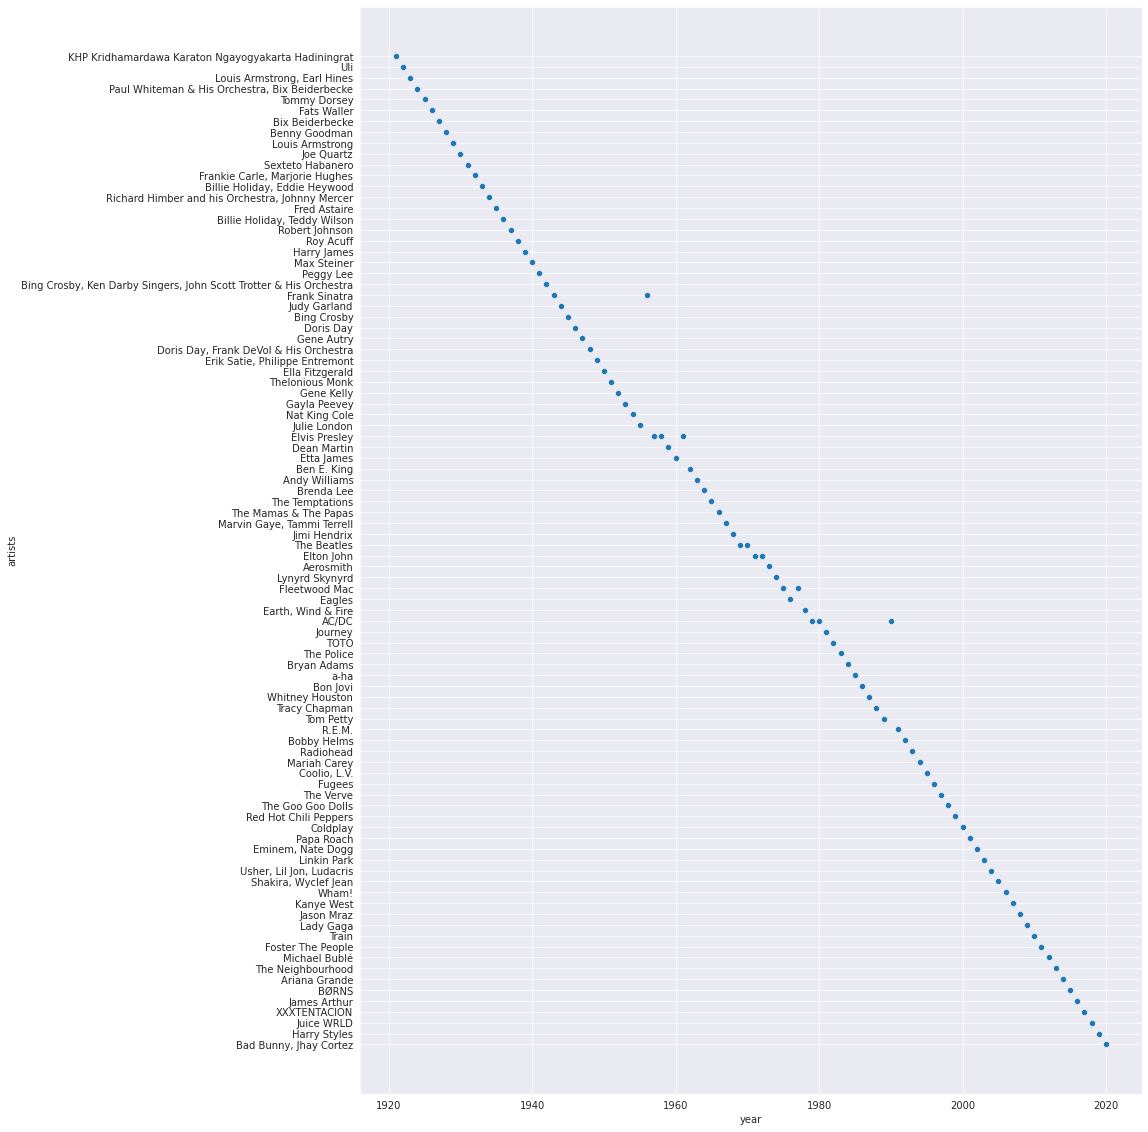

In [66]:
plt.figure(figsize=(14,20))
sns.scatterplot(y="artists", x="year", data= top_artists_each_year_df, )

Shown above are the most popular artists for each year from 1920-2020.

There are many big names in the dataset such as Elvis Presley, The Beatles, AC-DC, Lady Gaga etc.

It is interesting to observe that only a few artists have been able to appear on the graph for more than once. Those are Frank Sinatara, Elvis Presley, AC-DC, Fleetwood Mac, Elton John and The Beatles. All of these artists are from the 1900's and they still are very huge in the current day. Hence, it is not completely surprising that these artists have been the most popular for a year multiple times.


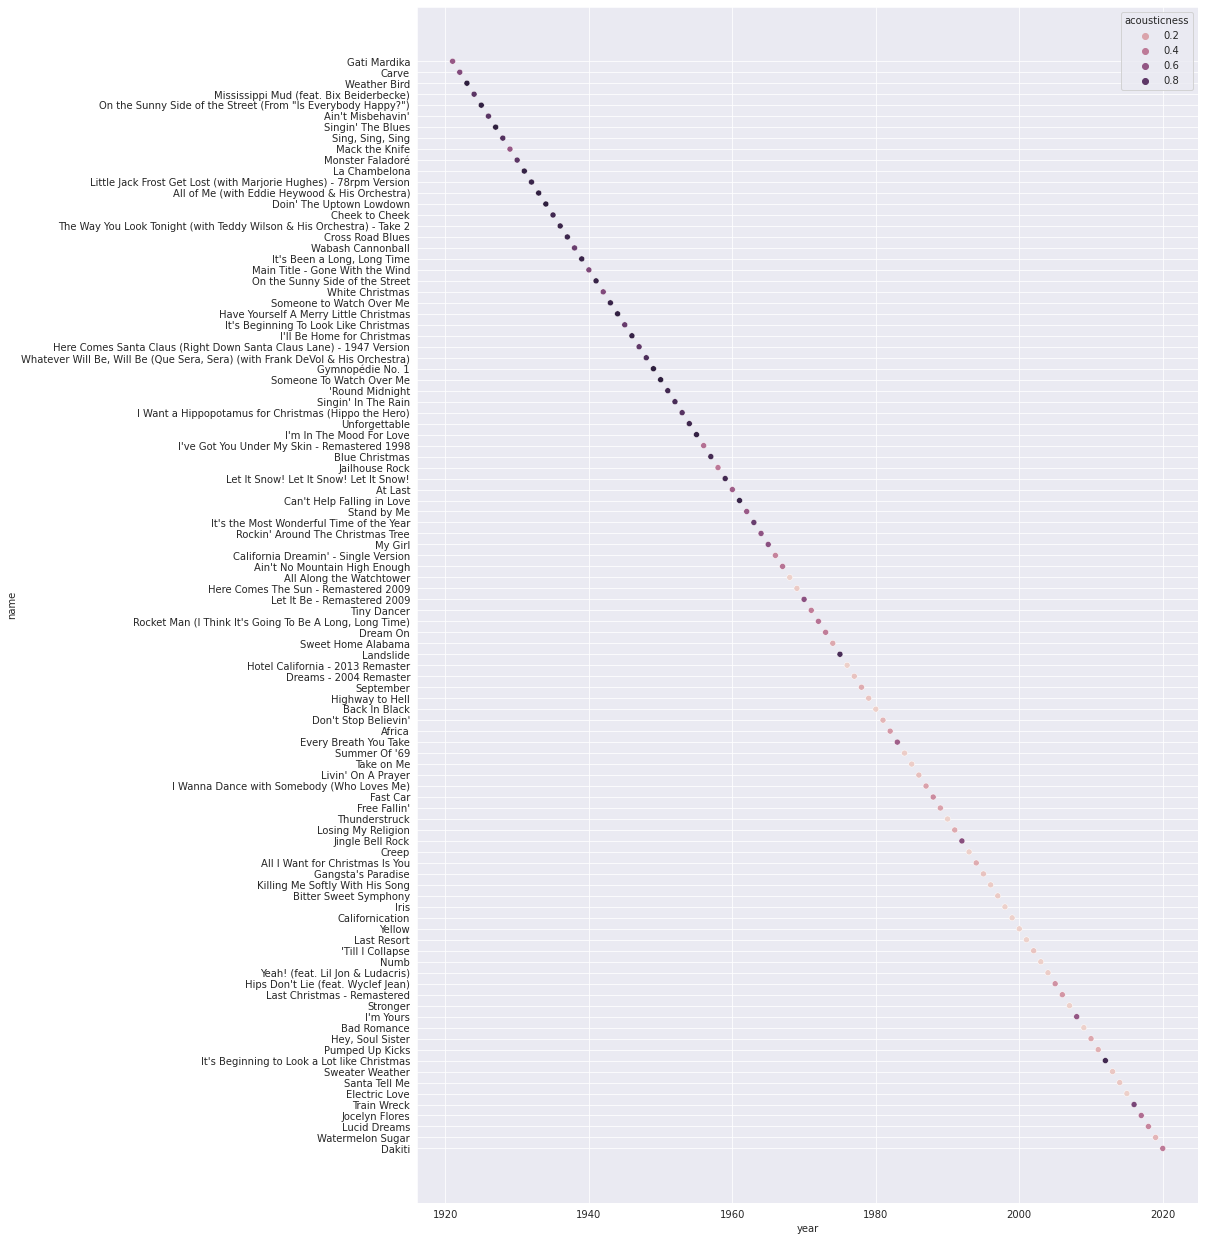

In [67]:
plt.figure(figsize=(14,22))
sns.scatterplot(y="name",hue="acousticness", x="year", data= top_artists_each_year_df, )

Shown above is a scatterplot of the top songs each year from the 1920s to the 2020s. The scatterplot also displays the acousticness of each song.

It is very interesting to observe that no song has been on the graph for more than one year. I guess people like to get stuck on artists but not on their songs.

Also, the acousticness seems to be highest in 1920-1960 and then has a steay decline from their onwards. This may be attributed to the meregence of Hard Rock and Heavy Metal music which gave a lot of focus to the music and instruments as well. Hence, the acousticness declined. However, the trend is beginning to change again as the songs get more and more vocals oriented with now the emergence of new genres such as Mumble Rap and new wave of Hip-Hop.

In [68]:
artists_df.head()

genres  ... count
0  ['show tunes']  ...     9
1              []  ...    26
2              []  ...     7
3              []  ...    27
4              []  ...     7

[5 rows x 16 columns]

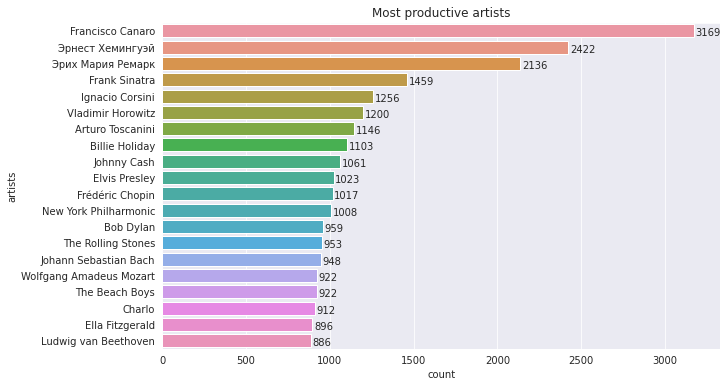

In [75]:
plt.figure(figsize=(10,6))
plot1=sns.barplot(data=artists_df.sort_values("count", ascending=False).head(20),x="count" ,y="artists")
plt.title("Most productive artists")
for p in plot1.patches:
    width = p.get_width()    
    plt.text(10+p.get_width(), p.get_y()+0.65*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center')
  

These are the top 20 artists according to their productivness i.e. the number of their released songs. It is no surprise that most of these artists are not of the current era since artists tend to be a lot thoughtful about releasing their music in the present day. This is because a lot of work needs to be done now with the music video and Tours which gives a lot less time for an artist to release new songs.

# ***8. Genre popularity over the decades***

In [76]:
genre_w_df=pd.read_csv('./spotify-dataset-19212020-160k-tracks/data_o.csv')
genre_w_df["artists"] = genre_w_df.artists.apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
genre_w_df=genre_w_df.explode("artists")
genre_w_df=pd.merge(genre_w_df,artists_df[["artists","genres"]], on="artists", how="inner")
genre_w_df.set_index("release_date", inplace=True)
genre_w_df.index=pd.to_datetime(genre_w_df.index)
genre_df=genre_w_df.drop(["artists"],axis=1).drop_duplicates()
decade_popularity=pd.DataFrame()
popular_genres=["pop","indie","rock","metal","rap","jazz"]
for genre in popular_genres:
  genre_decade_df=genre_df[genre_df.genres.str.contains(genre)].resample("10A").mean()
  genre_decade_df.index = [f"{round(date_index/10)*10}'s" for date_index in genre_decade_df.index.year]
  decade_popularity[genre] = genre_decade_df["popularity"]
decade_popularity.fillna(0,inplace=True)

In [77]:
decade_popularity

pop      indie       rock      metal        rap       jazz
1920's   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
1930's   0.274510   0.000000   0.000000   0.000000   0.000000   7.574803
1940's   2.336864   5.060606   3.627040   0.000000   0.000000   9.700331
1950's   2.198933   2.000000   1.627907   0.000000   2.785714  10.778247
1960's  16.430019   9.222222  16.282995   0.000000  11.025000  16.969829
1970's  29.421258  24.302158  27.438701  31.045977  24.963964  27.543442
1980's  36.165765  34.162281  34.592993  33.898678  35.847953  33.715681
1990's  40.344787  33.924242  37.145963  37.860614  36.896266  38.044289
2000's  47.254565  41.257038  43.022900  45.505381  44.805970  44.665031
2010's  52.327039  47.408046  49.115523  50.365650  50.484123  50.798883
2020's  62.018952  54.936102  54.503474  56.589311  60.913601  57.830769

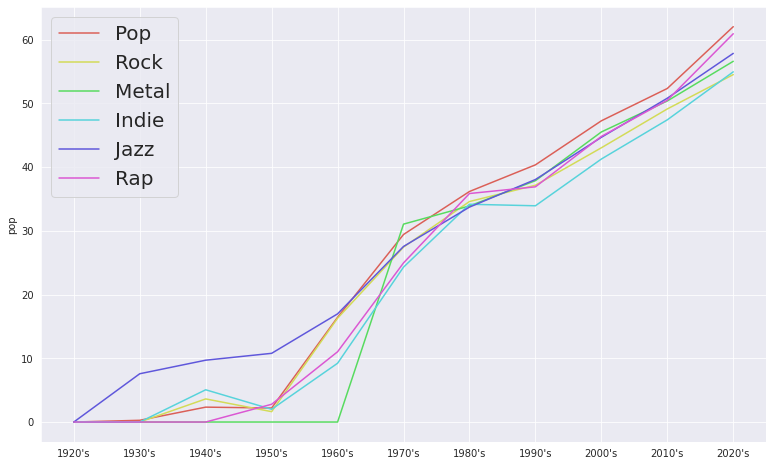

In [78]:
plt.figure(figsize=(13,8))
sns.set_palette("hls")
sns.lineplot(x=decade_popularity.index, y="pop", data=decade_popularity, label="Pop")
sns.lineplot(x=decade_popularity.index, y="rock", data=decade_popularity,label="Rock")
sns.lineplot(x=decade_popularity.index, y="metal", data=decade_popularity,label="Metal")
sns.lineplot(x=decade_popularity.index, y="indie", data=decade_popularity,label="Indie")
sns.lineplot(x=decade_popularity.index, y="jazz", data=decade_popularity,label="Jazz")
sns.lineplot(x=decade_popularity.index, y="rap", data=decade_popularity,label="Rap")
plt.legend(fontsize=20)


The lineplot shown above displays the popularity of six genres over the years. Those genres are Pop, Rock, Metal, Indie, Jazz and Rap.

**Pop** - Pop music is a genre which was derived from rock and roll in the Western world around 1950s. It’s not to be confused with popular music which describes all music that is popular. But yes, pop music is popular music and it appears there is scientific explanation for it’s popularity.

Several studies have shown that the parts of brain responsible for emotions and especially our brain’s reward centers respond more actively to a piece of the music that it’s already acquainted with than to an yet unfamiliar song, even if the latter fits the person’s musical taste far better.
Really, this is no surprise. Humans love repetition. We feel more safe and comfortable interacting with something we are already familiar with; such experience is more compelling and enjoyable for the majority. Repetition invites the listener into the music as active participant – It doesn’t take long until one’s tapping the feet following the rhythm of the song.


**Rock** - Rock Music is popular for its easy, communicative lyrics & desperate straight approach. Rock could be musical or lyrical. The original form of Rock Music came along with distorted Guitar, Bass, Drum and Aggressive vocals. In the year late 1950’s U.S & U.K started practicing & blending along with Afro Music & established the Genre Rock. It came thru from every other musical Genres like Jazz, Blues, Country, Folk and others.

The Rock Music style introduces more desperate, straight communication to every life, on any subject. The lyrics could lead it to personal love to social changes/commitments or protest, But the approach is always attacking straight or naked to peoples thought. And finally the attitude of disclosing facts in the simplest way made it the among most popular genres of all time.


**Metal** - Metal is a genre of rock music that developed in the late 1960s and early 1970s, largely in the United Kingdom and in the United States.With roots in blues and psychadelic rock the bands that created heavy metal developed a thick, massive sound, characterized by highly amplified distortion ,extended guitar solos, emphatic beats, and overall loudness. Heavy metal lyrics and performance styles are generally associated with masculinity and machismo

The first heavy metal bands such as Black sabbath attracted large audiences, though they were often derided by critics, a status common throughout the history of the genre. In the mid-1970s Judas Priest helped spur the genre's evolution by discarding much of its Blues influence;Motorhead introduced a punk rock sensibility and an increasing emphasis on speed.


**Indie** - Back in the late 1970’s-80’s, the Indie and Punk Rock scene would literally rock the world like they’ve never seen before. It inspired the “grunge” era in teens with rebellion and made way for many famous bands such as Green Day, The Red Hot Chili Peppers, Blink-182, Smashing Pumpkins, and many other noteworthy artists from this scene break out into famously acclaimed bands. It was known to be the outcast genre of music that only “wild teenagers” would love to listen to. It grew for its reputation of loud and energetic music that would overtime fade into a mere “emo” phase that young adolescents would go through. But as the years went by into the late 90’s-2000’s, pop took over the mainstream music world and began an entire new culture.

Sure, while Indie Music wasn’t looked upon in the best light with crazy bands having wild concerts and controversial performances, It did have its reigning time in the spotlight. But if it had its short period of time back in the 70’s and 80’s, why has it come back?

Starting as early as the early 2010’s, the “grunge” era began to surface the teenage spectacle and once one person began to follow the trend. it was everywhere.

Around 2014 all anyone would do was to post the most hipster-like and angst teen photos on Tumblr, buy the most bizarre and “edgy” trends such as crazy pastel colored hair-dye all black everything, and fake nose rings, and become obsessed with then popular artists such as Lana Del Ray, The 1975, Arctic Monkeys, Five Seconds Of Summer, Marina and The Diamonds, and the list goes on. It made way for such odd artists to breakthrough to the mainstream world once again and become once again a major influence in the younger audience for mainstream pop culture.


**Jazz** - Jazz music originated in New Orleans over 100 years ago, with roots that can be found in the musical traditions of both Africa and Europe. Since the very beginning, jazz has been a constantly evolving, expanding, and changing genre of music. Primarily invented by African American musicians, jazz was not written down in the same way as previous music, but instead, the styles and tunes were passed on from one to another by ear. Throughout its history, jazz music has straddled the worlds of popular music and art music, and it’s gotten to a point where its styles and sound are so varied that one may sound completely unrelated to another. Jazz was first performed in bars, but can now be heard all over the world in clubs, museums, universities, festivals, and homes everywhere.


**Rap** - Rapping first gained popularity in the U.S. in the 1970s as a kind of street art, especially among African American teenagers. But it wasn't until 1979, when the Sugarhill Gang released their breakaway hit, "Rapper's Delight", that record producers took notice of this emerging musical genre. It is a culture and a form of expression that started in the late '70s as a social-political empowerment movement.

Rapping essentially involves the speaking or chanting of rhyming lyrics, often set to a beat. The rhyming created by rappers is considered by many to be o­ne of the most sophisticated styles of poetry. What’s more, these rhymes often address provocative subjects such as sex, violence and socio-political issues.

By the 1990s, rap matured from an old-school-style – which was based o­n relatively simple lyrics – to a new-school-style, which was louder and included more complex lyrics.

It’s birthed new subgenres, such as mumble rap, rapmetal and rapcore; it’s infiltrated almost every genre at least once or twice (looking at you, disco, jazz, and reggaeton); it bridged the gap between spoken poetry and instrumentation.

# ***8. Favourites Analysis***

I've always liked listening to music that has a good bit of instruments in them played by maestros and virtuosos. So it is no surprise that the 4 genres I've picked for this analysis are Progressive Metal, Instrumental Rock, Progressive Rock and Thrash Metal.

In this section, we'll be looking for the top 20 artists of this genre accoring to the number of songs released and then looking at the popularity of the top ten songs by an artist.

## *A. Progressive Metal*

<img src="https://drive.google.com/uc?export=view&id=1fyn_gLgQZoENdUA8LxfVF4K5LpjTERDq" width="600" height="600" /> 




Progressive metal (sometimes shortened to prog metal) is a broad fusion music genre melding heavy metal and progressive rock, combining the loud "aggression" and amplified guitar-driven sound of the former with the more experimental, cerebral or "pseudo-classical" compositions of the latter. One of these experimental examples introduced to modern metal was djent. The music typically showcases the extreme technical proficiency of the performers and usually uses unorthodox harmonies as well as complex rhythms with frequent meter changes and intense syncopation.

While the genre emerged towards the late-1980s, it was not until the 1990s that progressive metal achieved widespread success. Queensrÿche, Dream Theater, Tool, Symphony X, Shadow Gallery, King's X, and Fates Warning are a few examples of progressive metal bands who achieved commercial success. Soon after the rise of the genre's popularity, other thrash and death metal bands started to incorporate elements of progressive music in their work.

In [79]:
genre_2_df=pd.read_csv('./spotify-dataset-19212020-160k-tracks/data_o.csv')
genre_2_df["artists"] = genre_2_df.artists.apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
genre_2_df=genre_2_df.explode("artists")
genre_2_df=pd.merge(genre_2_df,artists_df[["artists","genres"]], on="artists", how="inner")
genre_2_df["genres"] = genre_2_df.genres.apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
genre_2_df=genre_2_df.explode("genres")
genre_2_df.set_index("release_date", inplace=True)
genre_2_df.index=pd.to_datetime(genre_2_df.index)


In [80]:
genre_2_df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'speechiness',
       'tempo', 'genres'],
      dtype='object')

[Text(0.5, 1.0, 'Progressive Metal artists with the number of songs released')]

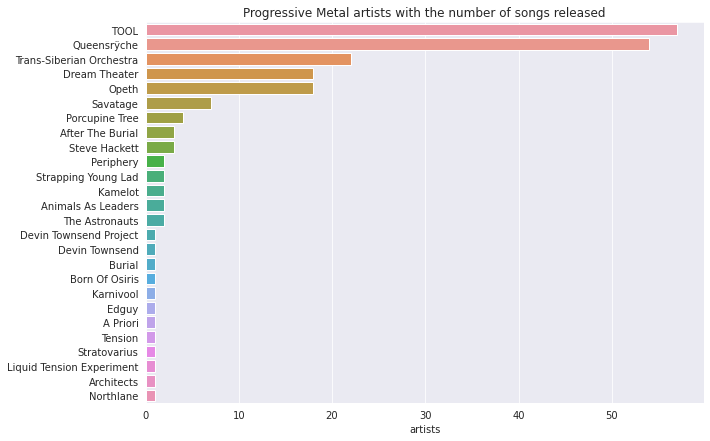

In [81]:
plt.figure(figsize=(10,7))
prog_metal_df=genre_2_df[genre_2_df["genres"].str.contains("progressive metal")].drop_duplicates()
sns.barplot(x=prog_metal_df.artists.value_counts(), y=prog_metal_df.artists.value_counts().index).set(title="Progressive Metal artists with the number of songs released")


### *TOOL*

Tool is widely regarded as the greatest Progressive Metal band of all time, hence it is not a surprise that they have the highest number of songs as well.

<img src="https://drive.google.com/uc?export=view&id=10L1TU0TO431ZO7YMUlTjP3dFsiVU7hiw" width="700" height="450" /> 


Tool is an American rock band from Los Angeles. Formed in 1990, the group's line-up includes drummer Danny Carey, guitarist Adam Jones, and vocalist Maynard James Keenan. Justin Chancellor has been the band's bassist since 1995, replacing their original bassist Paul D'Amour. Tool has won four Grammy Awards, performed worldwide tours, and produced albums topping the charts in several countries.

To date, the band has released five studio albums, one EP and one box set. They emerged with a heavy metal sound on their first studio album, Undertow (1993), and became a dominant act in the alternative metal movement with the release of their follow-up album Ænima in 1996. Their efforts to unify musical experimentation, visual arts, and a message of personal evolution continued with Lateralus (2001) and 10,000 Days (2006), gaining critical acclaim and international commercial success. Their fifth studio album, Fear Inoculum, was released on August 30, 2019 to widespread critical acclaim. Prior to its release, the band had sold over 13 million albums in the US alone.

In [82]:
tool_df=(prog_metal_df.loc[prog_metal_df["artists"]=="TOOL", ["popularity","name"]]).sort_values("popularity", ascending=False)
tool_df=tool_df.head(10)

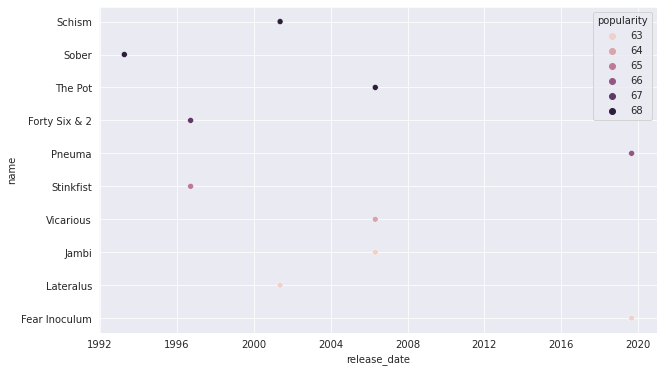

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=tool_df.index, y=tool_df.name, hue="popularity", data=tool_df)

## *B. Instrumental rock*





<img src="https://drive.google.com/uc?export=view&id=1IVdTudTnMYajISgWiCm3vdb9RyoK19hu" width="500" height="500" /> 



Instrumental rock is rock music that emphasizes musical instruments and features very little or no singing. Examples of instrumental rock can be found in practically every subgenre of rock, often from musicians who specialize in the style. Instrumental rock was most popular from the mid-1950s to mid-1960s, with artists such as Bill Doggett Combo, The Fireballs, The Shadows, The Ventures, Johnny and the Hurricanes and The Spotnicks. Surf music had many instrumental songs. Many instrumental hits came from the R&B world. Funk and disco produced several instrumental hit singles during the 1970s. The Allman Brothers Band feature several instrumentals. Jeff Beck also recorded two instrumental albums in the 1970s. Progressive rock and art rock performers of the 1960s and 1970s did many virtuosic instrumental performances.

During the 1980s and 1990s, the instrumental rock genre was dominated by several guitar soloists, including Joe Satriani, Yngwie Malmsteen and Steve Vai. The 2000s gave way to a new style of instrumental performer. For example, John Lowery (a.k.a. John 5), released a solo instrumental album. The 2000s also saw the rise of instrumental music by bands that have been labeled post-rock.

[Text(0.5, 1.0, 'Instrumental Rock artists with the number of songs released')]

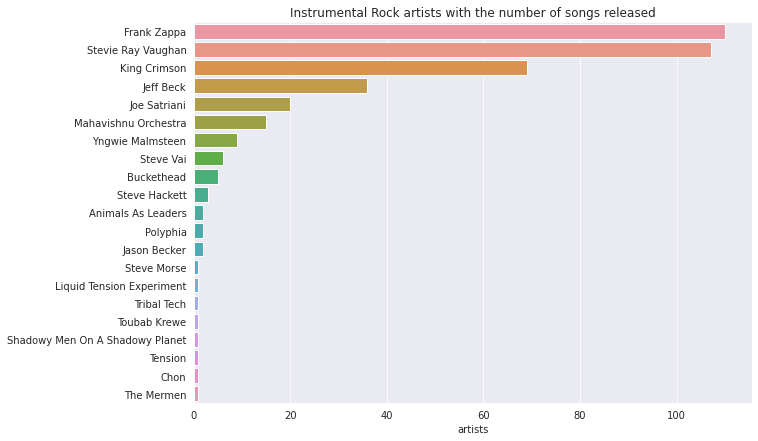

In [84]:
plt.figure(figsize=(10,7))
instrumental_df=genre_2_df[genre_2_df["genres"].str.contains("instrumental rock")].drop_duplicates()
sns.barplot(x=instrumental_df.artists.value_counts(), y=instrumental_df.artists.value_counts().index).set(title="Instrumental Rock artists with the number of songs released")

All of the artists above have exceptional ability and talent. My favourite from the lot is Joe Satriani, hence we'll dive into his top ten hits.

### *Joe Satriani*

<img src="https://drive.google.com/uc?export=view&id=1j2mxopT4Ly-LRKuEufbBUbmWZH2YXlnK" width="600" height="450" /> 



Joseph Satriani (born July 15, 1956) is an American guitarist, composer, songwriter, and guitar teacher. Early in his career, Satriani worked as a guitar instructor, with many of his former students achieving fame, including Steve Vai, Larry LaLonde, Rick Hunolt, Kirk Hammett, Andy Timmons, Charlie Hunter, Kevin Cadogan, and Alex Skolnick; he then went on to have a successful solo music career. He is a 15-time Grammy Award nominee and has sold over 10 million albums, making him the bestselling instrumental rock guitarist of all time.

In 1988, Satriani was recruited by Mick Jagger as lead guitarist for his first solo tour. Satriani briefly toured with Deep Purple, joining shortly after the departure of Ritchie Blackmore in November 1993. He has worked with a range of guitarists during the G3 tour, which he founded in 1995. Satriani has been the guitarist for the supergroup Chickenfoot since joining the band in 2008.

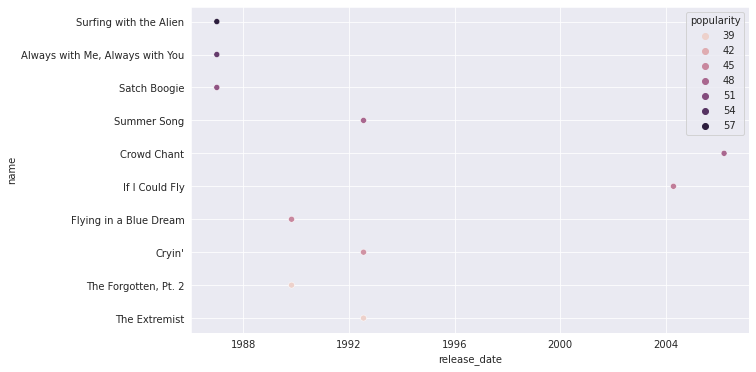

In [85]:
joe_df=(instrumental_df.loc[instrumental_df["artists"]=="Joe Satriani", ["popularity","name"]]).sort_values("popularity", ascending=False)
joe_df=joe_df.head(10)
plt.figure(figsize=(10,6))
sns.scatterplot(x=joe_df.index, y=joe_df.name, hue="popularity", data=joe_df)

## *C. Psychedelic Rock*

<img src="https://drive.google.com/uc?export=view&id=19UdRDFxwiq0mZ2Y2q9ER2SA8krQRIgck" width="500" height="500" /> 


Psychedelic rock, style of rock music popular in the late 1960s that was largely inspired by hallucinogens, or so-called “mind-expanding” drugs such as marijuana and LSD (lysergic acid diethylamide; “acid”), and that reflected drug-induced states through the use of feedback, electronics, and intense volume.

Emerging in 1966, psychedelic rock became the soundtrack of the wider cultural exploration of the hippie movement. Initially centred on the West Coast of the United States, where the early Grateful Dead was the house band at novelist Ken Kesey’s Acid Test multimedia “happenings,” psychedelia soon spread from the San Francisco Bay area to the rest of the country and then to Europe to become the major rock phenomenon of the late 1960s. In addition to the Grateful Dead, West Coast psychedelic bands included Love, the Charlatans, the Doors, and the Jefferson Airplane, the last of which featured the striking vocals of Grace Slick and scored Top Ten hit singles in 1967 with “Somebody to Love” and “White Rabbit.” Meanwhile, the 13th Floor Elevators from Austin, Texas, epitomized the darker, more psychotic frenzy of acid rock—characterized by overdriven guitars, amplified feedback, and droning guitar motifs influenced by Eastern music. Led by the wayward talent of Roky Erickson, a gifted musician who was later hospitalized for mental illness, the 13th Floor Elevators released four frenetic albums featuring bizarre jug-blowing blues before imploding in 1969. On the East Coast, the Velvet Underground symbolized a nihilistic cool version of psychedelia, picking up on its sonic techniques yet distancing themselves from the more playful “flower power” culture.

Established rock bands also began to introduce psychedelic elements into their music—notably the Beatles with such albums as Revolver (1966), Sgt. Pepper’s Lonely Hearts Club Band (1967), and Magical Mystery Tour (1967), the Beach Boys with the expansive, haunting Pet Sounds (1966), and the Yardbirds with “Shapes of Things” (1966). The Rolling Stones ventured into the scene with the less successful Their Satanic Majesties Request (1967), while such groups as the Byrds created a more commercial version of raw psychedelia.

[Text(0.5, 1.0, 'Psychedelic Rock artists with the number of songs released')]

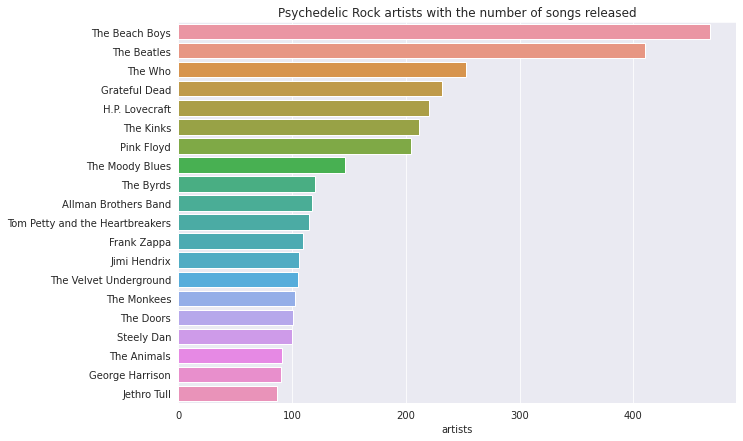

In [86]:
plt.figure(figsize=(10,7))
psych_df=genre_2_df[genre_2_df["genres"].str.contains("psychedelic rock")].drop_duplicates()
sns.barplot(x=psych_df.artists.value_counts().head(20), y=psych_df.artists.value_counts().head(20).index).set(title="Psychedelic Rock artists with the number of songs released")

Pink Floyd is widely regarded as one of the greatest bands of all time and THE greatest psychedelic band of all time.

### *Pink Floyd*

<img src="https://drive.google.com/uc?export=view&id=1cs95ZEye14X_WLlGNGnM9104y-gdcSXc" width="700" height="450" /> 


Pink Floyd were an English rock band formed in London in 1965. Gaining an early following as one of the first British psychedelic groups, they were distinguished for their extended compositions, sonic experimentation, philosophical lyrics and elaborate live shows, and became a leading band of the progressive rock genre, cited by some as the greatest progressive rock band of all time.

Pink Floyd were founded by Syd Barrett (guitar, lead vocals), Nick Mason (drums), Roger Waters (bass guitar, vocals), Richard Wright (keyboards, vocals) and Bob Klose (guitars). Under Barrett's leadership, they released two charting singles and the successful debut album, The Piper at the Gates of Dawn (1967). Guitarist and vocalist David Gilmour joined in December 1967; Barrett left in April 1968 due to deteriorating mental health. Waters became the primary lyricist and thematic leader, devising the concepts behind the band's peak of critical and commercial success with the albums The Dark Side of the Moon (1973), Wish You Were Here (1975), Animals (1977) and The Wall (1979). The musical film based on The Wall, Pink Floyd – The Wall (1982), won two BAFTA Awards.

Following personal tensions, Wright left Pink Floyd in 1979, followed by Waters in 1985. Gilmour and Mason continued as Pink Floyd, rejoined later by Wright. The band produced two more albums—A Momentary Lapse of Reason (1987) and The Division Bell (1994)—and toured in support both albums before entering a long period of inactivity. In 2005, all but Barrett reunited for a one-off performance at the global awareness event Live 8. Barrett died in 2006, and Wright in 2008. The last Pink Floyd studio album, The Endless River (2014), was based on unreleased material from the Division Bell recording sessions.

By 2013, Pink Floyd had sold more than 250 million records worldwide, making them one of the best-selling music artists of all time. The Dark Side of the Moon and The Wall are among the best-selling albums of all time, and both have been inducted into the Grammy Hall of Fame.[1] Four of the band's albums topped the US Billboard 200, and five of their albums topped the UK Album Chart. Hit singles produced include "See Emily Play" (1967), "Money" (1973), the three-part composition "Another Brick in the Wall" (1979), "Not Now John" (1983), "On the Turning Away" (1987) and "High Hopes" (1994). The band also composed several film scores. They were inducted into the US Rock and Roll Hall of Fame in 1996 and the UK Music Hall of Fame in 2005. In 2008, King Carl XVI Gustaf of Sweden presented Pink Floyd with the Polar Music Prize for their contribution to modern music.

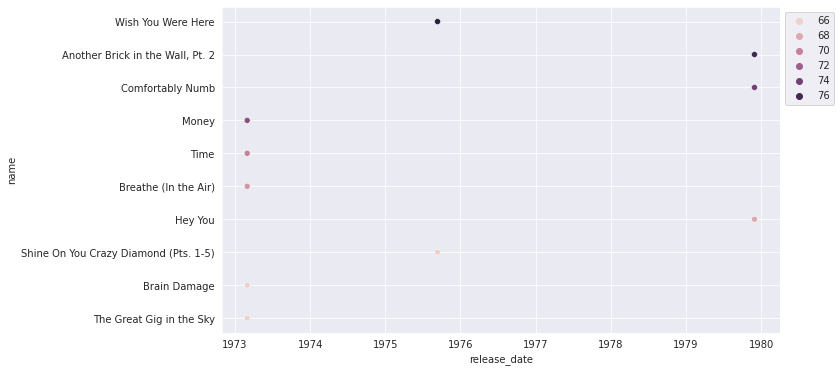

In [87]:
floyd_df=(psych_df.loc[psych_df["artists"]=="Pink Floyd", ["popularity","name"]]).sort_values("popularity", ascending=False)
floyd_df=floyd_df.head(10)
plt.figure(figsize=(10,6))
sns.scatterplot(x=floyd_df.index, y=floyd_df.name, hue="popularity", data=floyd_df)
plt.legend(bbox_to_anchor=(1,1))

## *D. Thrash Metal*

<img src="https://drive.google.com/uc?export=view&id=10xbuq_KUdk9Ot-PEJJXJOtnoonYyso9D" width="500" height="500" /> 



Thrash metal (or simply thrash) is an extreme subgenre of heavy metal music characterized by its overall aggression and often fast tempo. The songs usually use fast percussive beats and low-register guitar riffs, overlaid with shredding-style lead guitar work. The lyrical subject matter often deals with criticisms of The Establishment and concern over the destruction of the environment, and at times shares a disdain for Christian dogma resembling that of their black metal counterparts. The language is typically direct and denunciatory, an approach borrowed from hardcore punk.

The genre emerged in the early 1980s as musicians began fusing the double bass drumming and complex guitar stylings of the new wave of British heavy metal (NWOBHM) with the speed and aggression of hardcore punk. Philosophically, thrash metal developed as a backlash against both the conservatism of the Reagan era and the much more moderate, pop-influenced and widely accessible heavy metal subgenre of glam metal which also developed concurrently in the 1980s.



[Text(0.5, 1.0, 'Thrash Metal artists with the number of songs released')]

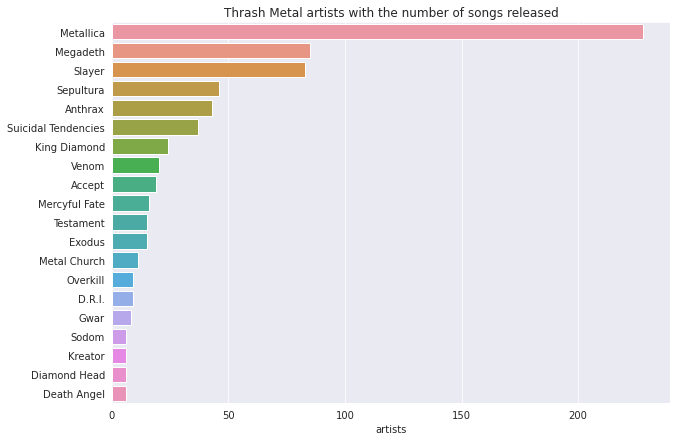

In [88]:
plt.figure(figsize=(10,7))
thrash_df=genre_2_df[genre_2_df["genres"].str.contains("thrash metal")].drop_duplicates()
sns.barplot(x=thrash_df.artists.value_counts().head(20), y=thrash_df.artists.value_counts().head(20).index).set(title="Thrash Metal artists with the number of songs released")

### *Metallica*

<img src="https://drive.google.com/uc?export=view&id=1uIm2bRIFNxmi8PTUfpSgmAxo4KlH9ds7" width="550" height="550" /> 



Metallica is an American heavy metal band. The band was formed in 1981 in Los Angeles by vocalist/guitarist James Hetfield and drummer Lars Ulrich, and has been based in San Francisco for most of its career. The band's fast tempos, instrumentals and aggressive musicianship made them one of the founding "big four" bands of thrash metal, alongside Megadeth, Anthrax and Slayer. Metallica's current lineup comprises founding members and primary songwriters Hetfield and Ulrich, longtime lead guitarist Kirk Hammett, and bassist Robert Trujillo. Guitarist Dave Mustaine (who went on to form Megadeth after being fired from the band) and bassists Ron McGovney, Cliff Burton (who died in a bus accident in Sweden in 1986) and Jason Newsted are former members of the band.


Metallica has released ten studio albums, four live albums, a cover album, five extended plays, 37 singles and 39 music videos. The band has won nine Grammy Awards from 23 nominations, and its last six studio albums (beginning with Metallica) have consecutively debuted at number one on the Billboard 200. Metallica ranks as one of the most commercially successful bands of all time, having sold over 125 million albums worldwide as of 2018. Metallica has been listed as one of the greatest artists of all time by magazines such as Rolling Stone, which ranked them at no. 61 on its 100 Greatest Artists of All Time list. As of 2017, Metallica is the third best-selling music artist since Nielsen SoundScan began tracking sales in 1991, selling a total of 58 million albums in the United States.

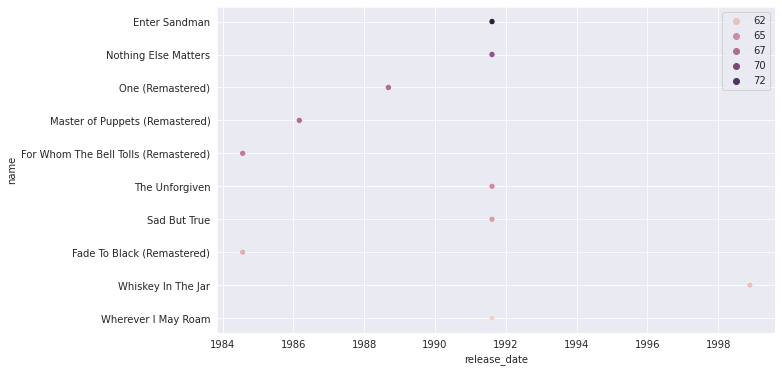

In [89]:

metallica_df=(thrash_df.loc[thrash_df["artists"]=="Metallica", ["popularity","name"]]).sort_values("popularity", ascending=False)
metallica_df=metallica_df.head(10)
plt.figure(figsize=(10,6))
sns.scatterplot(x=metallica_df.index, y=metallica_df.name, hue="popularity", data=metallica_df)
plt.legend(bbox_to_anchor=(1,1))

# ***Important Conclusions***

###The following conclusions can be drawn from the analysis of the dataset provided ->

1.   Pop Music is as popular today as it has ever been.

1.   Songs with more energy seem to be more popular.

1.   Songs that have higher acosuticness seem to be not as popular as the ones  with lower acousticness.

1.   The most popular keys for writing music are C and D.
2.   Most of the songs use the Major mode in their music.

2.   Pop, Rock, Indie and Metal music are the genres that have the most number of sub-genres.
2.   The average duration of the songs seem to be declining.


In [93]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
